Make the Main-Imports

In [314]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Einlesen der Trainingsdaten

In [315]:
# read the train data
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Analyse & Bereinigung der Trainingsdaten

In [316]:
len(df_train)

891

In [317]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [318]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [319]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [320]:
df_train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [321]:
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [322]:
df = df_train.groupby('Embarked')['PassengerId'].agg(len)
df

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

# Analyse:

Cabin - 687 NaN Werte -> Droppen

Name, Ticket, Fare - Unrelevante Daten -> Droppen

Alter - 177 NaN Werte -> Interpolieren

Embarked - 2 NaN Werte -> Median

In [323]:
drop_columns = ['Cabin', 'Name', 'Ticket', 'Fare']
df_train = df_train.drop(columns=drop_columns)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [324]:
df_train['Age'] = df_train['Age'].interpolate(method='linear')

In [325]:
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [326]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [327]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

# Visualisierung der Daten


### Wie hoch war die generelle Überlebensrate?

In [328]:
df_train['Survived'].mean()

np.float64(0.3838383838383838)

In [329]:
survived = df_train['Survived'].value_counts()

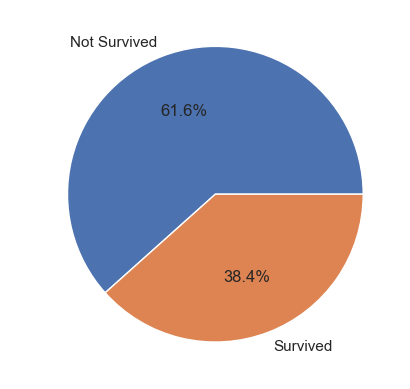

In [330]:
sns.set_theme()
survived.plot(kind='pie', autopct='%1.1f%%', labels=['Not Survived', 'Survived'])
plt.ylabel(' ')
plt.show()

### Wie hoch ist die Überlebensrate nach Geschlecht?

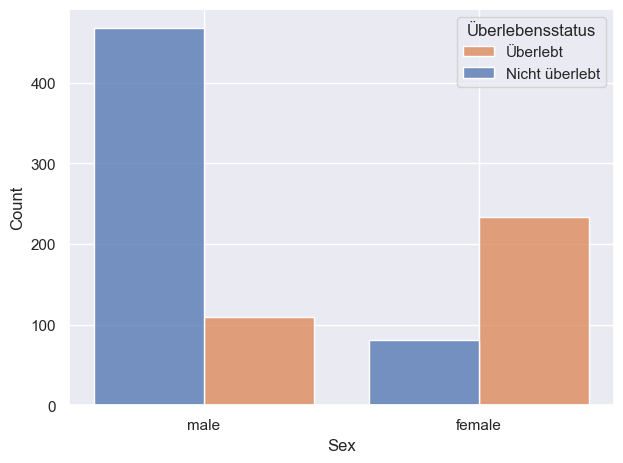

In [331]:
ax = sns.histplot(data=df_train, x='Sex', hue='Survived', 
             multiple='dodge', shrink=.8)

ax.legend(title='Überlebensstatus', labels=['Überlebt', 'Nicht überlebt'])
plt.tight_layout()
plt.show()

### Wie war die Überlebensrate nach Alter?

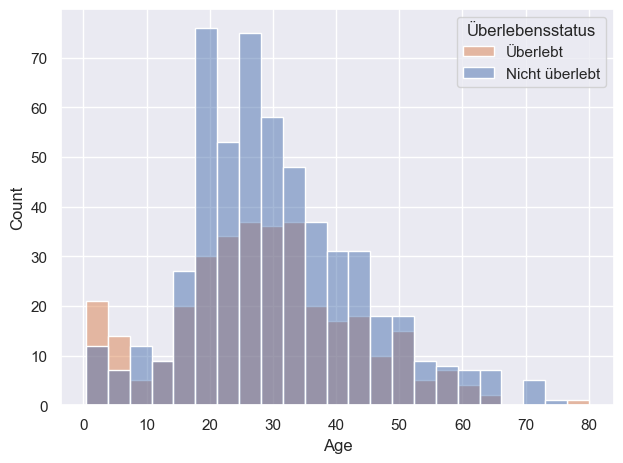

In [332]:
ax = sns.histplot(data=df_train, x='Age', hue='Survived', multiple='layer')
ax.legend(title='Überlebensstatus', labels=['Überlebt', 'Nicht überlebt'])
plt.tight_layout()
plt.show()

### Wie hoch war die Überlebensrate nach Zustiegsort?

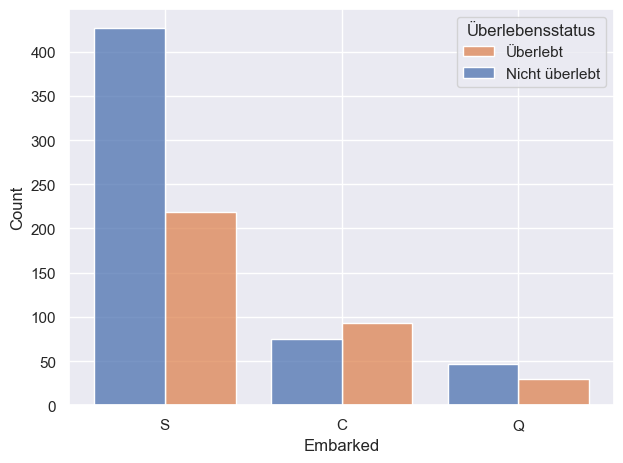

In [333]:
ax = sns.histplot(data=df_train, x='Embarked', hue='Survived', multiple='dodge', shrink=0.8)
ax.legend(title='Überlebensstatus', labels=['Überlebt', 'Nicht überlebt'])
plt.tight_layout()
plt.show()

# Erstellen eines ML Modells

### Modellierung der Daten

In [334]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [335]:
df_train['is_not_alone'] = np.where((df_train['SibSp'] + df_train['Parch']) > 0, 1, 0)


In [336]:
x = pd.get_dummies(df_train).drop(columns=['Survived', 'PassengerId', 'SibSp', 'Parch'])
x.head()

,Pclass,Age,is_not_alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,False,True,False,False,True
1,1,38.0,1,True,False,True,False,False
2,3,26.0,0,True,False,False,False,True
3,1,35.0,1,True,False,False,False,True
4,3,35.0,0,False,True,False,False,True


In [337]:
y = df_train['Survived']

In [396]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# x_tr, x_t, y_tr, y_t = train_test_split(x, y, train_size=0.9)

model = RandomForestClassifier(max_depth=5)
model.fit(x, y)

RandomForestClassifier(max_depth=5)

### Testdaten anpassen

In [402]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [403]:
df_test = df_test.drop(columns=drop_columns)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


In [404]:
df_test['is_not_alone'] = np.where((df_test['SibSp'] + df_test['Parch']) > 0, 1, 0)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,is_not_alone
0,892,3,male,34.5,0,0,Q,0
1,893,3,female,47.0,1,0,S,1
2,894,2,male,62.0,0,0,Q,0
3,895,3,male,27.0,0,0,S,0
4,896,3,female,22.0,1,1,S,1


In [405]:
pass_ids = df_test['PassengerId']
df_test = df_test.drop(columns=['PassengerId', 'SibSp', 'Parch'])
df_test.head()

,Pclass,Sex,Age,Embarked,is_not_alone
0,3,male,34.5,Q,0
1,3,female,47.0,S,1
2,2,male,62.0,Q,0
3,3,male,27.0,S,0
4,3,female,22.0,S,1


In [406]:
x_test = pd.get_dummies(df_test)
x_test

,Pclass,Age,is_not_alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,False,True,False,True,False
1,3,47.0,1,True,False,False,False,True
2,2,62.0,0,False,True,False,True,False
3,3,27.0,0,False,True,False,False,True
4,3,22.0,1,True,False,False,False,True
...,...,...,...,...,...,...,...,...
413,3,NaN,0,False,True,False,False,True
414,1,39.0,0,True,False,True,False,False
415,3,38.5,0,False,True,False,False,True
416,3,NaN,0,False,True,False,False,True


In [407]:
predictions = model.predict(x_test)

In [410]:
output = pd.DataFrame({'PassengerId': pass_ids, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
